**Assignment by Aadish Agrawal**

# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow
tensorflow.__version__

'2.2.0'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### Change current working directory to project folder (1 mark)

In [4]:
import os
path = '/tmp'
os.chdir(path)
!ls

drivefs_ipc.0  drivefs_ipc.0_shell  tmpak8fto74


### Extract the zip file (4 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [5]:
path = '/content/drive/My Drive/Week30_ComputerVision7_Advanced Computer Vision Project (Face Recognition)/'

images_zip_path = path + "PINS_modified.zip"
from zipfile import ZipFile

with ZipFile(images_zip_path, 'r') as z:
  z.extractall()

In [6]:
rm PINS_modified/.DS_Store

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [7]:
import numpy as np


class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS_modified')

### Define function to load image
- Define a function to load image from the metadata

In [8]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (4 marks)
- Load one image using the function "load_image"

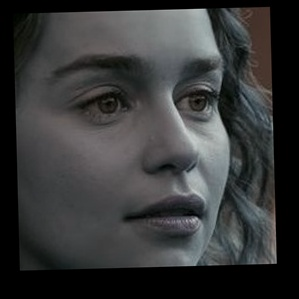

In [9]:
from google.colab.patches import cv2_imshow
path1 = '/content/drive/My Drive/Week30_ComputerVision7_Advanced Computer Vision Project (Face Recognition)/PINS_modified/pins_Emilia Clarke/Emilia Clarke100_998.jpg'
image = load_image(path1)
cv2_imshow(image)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (4 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [11]:
model = vgg_face()
model.load_weights('/content/drive/My Drive/Week30_ComputerVision7_Advanced Computer Vision Project (Face Recognition)/vgg_face_weights.h5')

### Get vgg_face_descriptor

In [12]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [13]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [14]:
embeddings = []
length = len(metadata)
for i in range(length) :   
  img_path = metadata[i].image_path()
  try :
    img = load_image(img_path)
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
  except :
    embedding_vector = np.zeros(2622)
  embeddings.append(embedding_vector)





In [15]:
embeddings = np.array(embeddings)

In [16]:
embeddings.shape  

(10770, 2622)

In [20]:
import pickle
with open('mypickle.pickle', 'wb') as f:
    pickle.dump(embeddings, f)

In [22]:
#testing

cp: target 'Drive/' is not a directory


### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [17]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

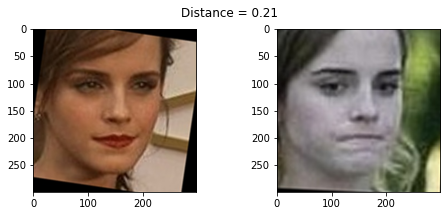

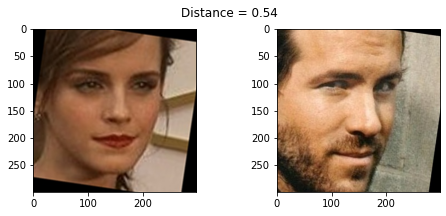

In [18]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.2f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

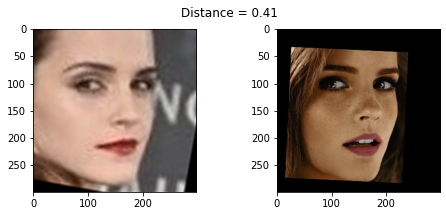

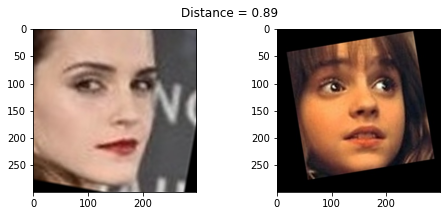

In [19]:
show_pair(30, 31)
show_pair(30, 100)

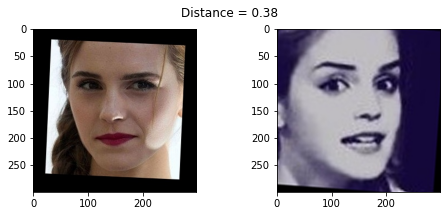

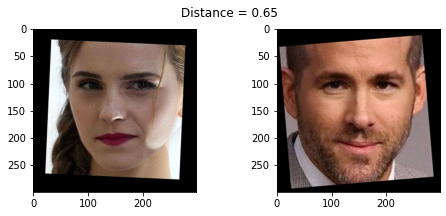

In [20]:
show_pair(70, 72)
show_pair(70, 200)

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [21]:
embeddings.dtype

dtype('float32')

In [22]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

X_train = embeddings[train_idx]
X_test = embeddings[test_idx]


y_train = []

y_test = []

y = []

for i in range(len(metadata)) : 
  y.append(metadata[i].name)

y = np.array(y)
y_train = y[train_idx]
y_test = y[test_idx]  
 


In [23]:
y_test

array(['pins_emma watson face', 'pins_emma watson face',
       'pins_emma watson face', ..., 'pins_grant gustin face',
       'pins_grant gustin face', 'pins_grant gustin face'], dtype='<U29')

### Encode the Labels (5 marks)
- Encode the targets
- Use LabelEncoder

In [24]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
ytrain_labels = encoder.fit_transform(y_train)
ytest_labels = encoder.transform(y_test)


In [25]:
ytrain_labels

array([78, 78, 78, ..., 80, 80, 80])

### Standardize the feature values (5 marks)
- Scale the features using StandardScaler

In [26]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xtrain_embeddings_scaled = scaler.fit_transform(X_train)

Xtest_embeddings_scaled = scaler.transform(X_test)


In [27]:
Xtrain_embeddings_scaled.shape

(9573, 2622)

### Reduce dimensions using PCA (5 marks)
- Reduce feature dimensions using Principal Component Analysis

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2000)
pca.fit(Xtrain_embeddings_scaled)
print(pca.explained_variance_ratio_)


[1.3602482e-01 5.3529311e-02 3.9942205e-02 ... 1.5569639e-06 1.5502762e-06
 1.5341446e-06]


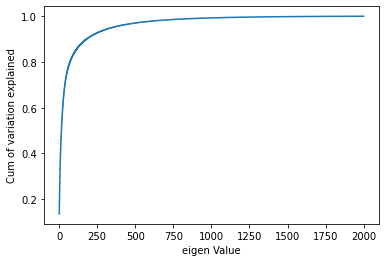

In [29]:
plt.step(list(range(1,2001)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [30]:
pca1 = PCA(n_components=400)
pca1.fit(Xtrain_embeddings_scaled)
print(pca1.components_)
print(pca1.explained_variance_ratio_)
Xpca = pca1.transform(Xtrain_embeddings_scaled)
Xpca_test = pca1.transform(Xtest_embeddings_scaled)

[[-2.3775954e-02  8.8860439e-03 -3.0246365e-03 ... -8.2962783e-03
   2.1129413e-02  3.8990147e-02]
 [ 2.0704007e-02 -8.6360268e-04  8.5518742e-03 ... -2.3610894e-02
  -4.2671328e-03  1.0714984e-02]
 [ 3.0837308e-03  3.5550944e-03 -6.0508540e-03 ...  1.0034392e-02
   9.3131377e-05 -1.4953416e-02]
 ...
 [ 1.8784743e-02 -1.6201964e-02 -3.8268089e-02 ...  1.8253593e-02
   6.3599302e-03  8.7819556e-03]
 [ 3.0702822e-02  3.2704685e-02 -2.9845716e-02 ... -1.2141942e-02
   5.7391122e-02  4.2580520e-03]
 [-1.9847471e-02 -2.6960230e-02  2.3840450e-02 ... -7.3980317e-03
   8.3065433e-03  1.1304711e-02]]
[1.36024728e-01 5.35291992e-02 3.99421602e-02 3.68907936e-02
 3.41483168e-02 3.15465219e-02 2.58920603e-02 2.35712621e-02
 2.10041497e-02 1.93015672e-02 1.80871803e-02 1.69400461e-02
 1.65739972e-02 1.57194398e-02 1.42386649e-02 1.36802895e-02
 1.29533224e-02 1.22758942e-02 1.14416182e-02 1.13818562e-02
 1.09381843e-02 1.05381943e-02 9.59034171e-03 9.42805596e-03
 9.05522611e-03 8.86222068e-03 8.3

### Build a Classifier (5 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [31]:
Xpca

array([[ 15.959375  ,   2.3486493 ,   2.8181944 , ...,  -0.16595954,
          1.1054655 ,  -0.964537  ],
       [ 12.88821   ,  -1.5631697 , -13.390983  , ...,  -0.5285963 ,
         -0.4832629 ,   0.9224331 ],
       [ 16.517406  ,   1.401671  ,  -0.47771347, ...,  -0.7444459 ,
          0.32883054,  -0.32716858],
       ...,
       [-16.17788   ,  -1.8053846 , -12.708939  , ...,  -0.7785586 ,
         -0.22656313,  -0.55081   ],
       [-21.930471  ,   7.274331  ,  -8.412887  , ...,  -0.13740349,
         -0.33479947,   0.2698693 ],
       [ -5.7039533 ,  40.062855  ,  -1.5606525 , ...,   0.91896373,
          0.49511787,  -2.1233401 ]], dtype=float32)

In [32]:
from sklearn.svm import SVC
clf = SVC()  
clf.fit(Xpca , ytrain_labels)
clf.score(Xpca , ytrain_labels)

0.9972840279954037

In [33]:
clf.score(Xpca_test , ytest_labels)

0.9649122807017544

### Test results (2 marks)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

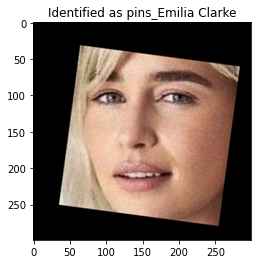

In [36]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 800

example_image = load_image(metadata[test_idx][example_idx].image_path())
embedding_prediction  =  embeddings[test_idx][example_idx]
embedding_prediction = embedding_prediction.reshape(1,-1)
Xtest_embeddings_scaled = scaler.transform(embedding_prediction)

Xpca2 = pca1.transform(Xtest_embeddings_scaled)

example_prediction = clf.predict(Xpca2)

example_identity = encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');









In [37]:
example_prediction  

array([20])

(2622,)